<a href="https://colab.research.google.com/github/ManavMNair/QuantumComputing/blob/main/Complementary_Bases_%26_Uncertainty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Complementary Bases & Uncertainty

##Purpose:
This notebook demonstrates the concept of complementary measurements (Pauli Z and X) and the uncertainty trade-off in quantum mechanics using Qiskit simulations.

##What it does:

- Prepares quantum states
∣+⟩ and
∣
0
⟩
.

- Measures each state in the Z basis and the X basis.

- Calculates measurement probabilities, standard deviations, and their product.

- Summarizes results in tables and provides a short interpretation of the uncertainty trade-off.

##How to run:

- Open the notebook in Google Colab or Jupyter.

- Install dependencies (Qiskit and Qiskit Aer).

- Run the cells in order.

- The notebook will output measurement counts, probabilities, histograms, and calculated uncertainties.

###Key takeaway:
The results show that when a state is certain in one basis, it is uncertain in the complementary basis — illustrating the quantum uncertainty trade-off.

#Install required packages

In [ ]:
!pip install qiskit qiskit_aer qiskit[visualization]

#Complementary Bases & Uncertainty

##Required Packages and functions

In [ ]:
from qiskit import *
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

def measure_circuit(qc):
  simulator = AerSimulator()

  compiled_circuit = transpile(qc, simulator)
  compiled_circuit.measure_all()
  result = simulator.run(compiled_circuit, shots = 1024).result()

  counts = result.get_counts(compiled_circuit)
  return counts

def calculate_sd(counts, shorts = 1024):
  n1 = counts.get('1',0)
  p1 = n1/shorts
  sd = np.sqrt(p1 * (1 - p1)) #Calculating Standard Devaition
  return p1, sd





#For state |+>


##Task 1: Z-basis measurement


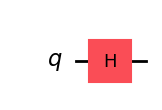

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw("mpl")

Counts :  {'0': 490, '1': 534}


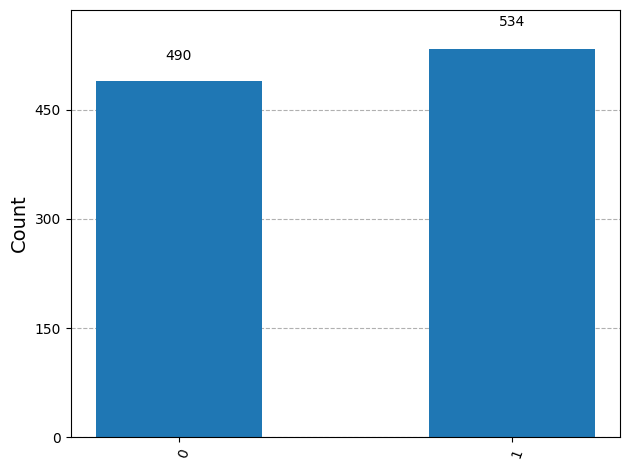

In [ ]:
counts = measure_circuit(qc)
print("Counts : ",counts)
plot_histogram(counts)


In [ ]:
#Calculate Standard deviation
pz, standard_deviation_Zbasis = calculate_sd(counts)
print(f"Standard deviation Z-basis : {standard_deviation_Zbasis}\nProbability ; {pz}")

Standard deviation Z-basis : 0.4995382083793585
Probability ; 0.521484375


##Task 2: X-Basis measurement

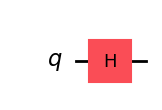

In [ ]:
qc2 = QuantumCircuit(1)
qc2.h(0)

qc2.h(0)
qc.draw("mpl")


{'0': 1024}


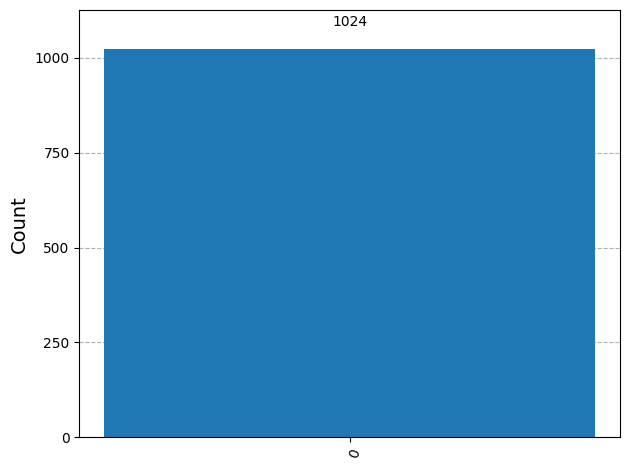

In [ ]:

counts = measure_circuit(qc2)
print(counts)
plot_histogram(counts)

In [ ]:
px, standard_deviation_xbasis = calculate_sd(counts)

print(f"Standard deviation X-basis : {standard_deviation_xbasis}\nProbability : {px}")

Standard deviation X-basis : 0.0
Probability : 0.0


In [ ]:
print(f"Product of standard deviations : {standard_deviation_Zbasis * standard_deviation_xbasis}")

Product of standard deviations : 0.0


#For state |0>


##Task 1: Z-basis Measurement

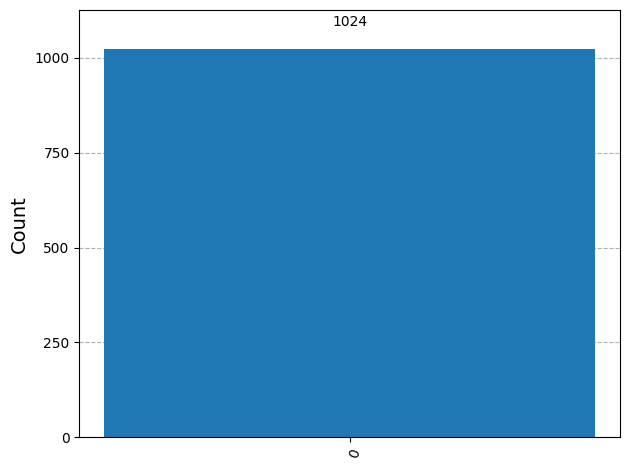

In [ ]:
qc_0 = QuantumCircuit(1)
qc_0.draw('mpl')
counts = measure_circuit(qc_0)
plot_histogram(counts)


In [ ]:
pz, standard_deviation_Zbasis = calculate_sd(counts)
print(f"Standard deviation Z-basis : {standard_deviation_Zbasis}\nProbability : {pz}")

Standard deviation Z-basis : 0.0
Probability : 0.0


##Task 2: X-basis Measurement

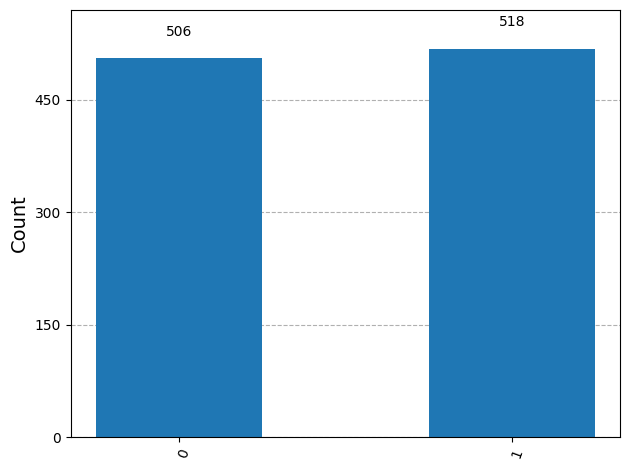

In [ ]:
qc_0.h(0)
counts = measure_circuit(qc_0)
plot_histogram(counts)

In [ ]:
px, standard_deviation_xbasis = calculate_sd(counts)
print(f"Standard deviation x basis : {standard_deviation_xbasis}\nProbability : {px}")

Standard deviation x basis : 0.4999656665458233
Probability : 0.505859375


In [ ]:
print(f"Product of standard deviations = {standard_deviation_Zbasis * standard_deviation_xbasis}")

Product of standard deviations = 0.0
